<a href="https://colab.research.google.com/github/Huxwell/ColabNNs/blob/main/cats_n_dogs_create_hybrids_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import torch.nn as nn
# import torch
# import torch.optim as optim
# import torch.nn.functional as F
# from torchvision import datasets, models, transforms
# from torch.utils.data import DataLoader, Dataset
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import glob
# from tqdm import tqdm
from PIL import Image
import random # do random.seed(13) before every shuffle. order of shuffle() execution changes results order.

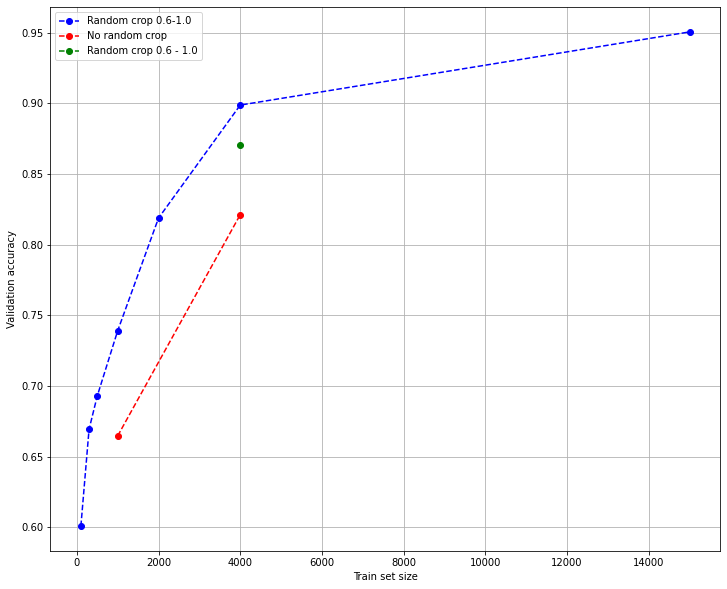

In [19]:
plt.figure(figsize=(12,10))
plt.plot([100, 300, 500, 1000, 2000, 4000, 15000],[0.6008, 0.6693, 0.692799,  0.739, 0.8188, 0.8988, 0.9506],'--bo', label="Random crop 0.6-1.0")
plt.plot([1000, 4000],[0.6646, 0.8212],'--ro', label="No random crop")
plt.plot([4000],[0.8702],'--go',  label="Random crop 0.6 - 1.0")
plt.legend()
plt.grid()
plt.xlabel('Train set size')
plt.ylabel('Validation accuracy')
plt.show()



In [3]:
dataset_dir = '/content/drive/MyDrive/cats_n_dogs_unsure/dogs-vs-cats-redux-kernels-edition'
os.listdir(dataset_dir)

['sample_submission.csv', 'test.zip', 'train.zip']

In [4]:
os.makedirs('local_data/', exist_ok=True)
train_dir = 'local_data/train'

In [5]:
with zipfile.ZipFile(os.path.join(dataset_dir, 'train.zip')) as train_zip:
    train_zip.extractall('local_data')

In [6]:
os.listdir(train_dir)[:5]

['cat.11580.jpg',
 'dog.8640.jpg',
 'cat.3504.jpg',
 'dog.1255.jpg',
 'dog.4316.jpg']

In [7]:
cats_list = sorted(glob.glob(os.path.join(train_dir,'cat*.jpg')))
dogs_list = sorted(glob.glob(os.path.join(train_dir,'dog*.jpg')))
print(len(cats_list))
print(len(dogs_list))
random.seed(13)
random.shuffle(cats_list)
random.seed(13) #multiple seed() executions are on purpose.
random.shuffle(dogs_list)
print(cats_list[:3])
print(dogs_list[:3])
# some sanity check to make sure no uncontrolled randomness beyond this point
assert cats_list[2] == 'local_data/train/cat.801.jpg'
assert dogs_list[2] == 'local_data/train/dog.801.jpg'
assert len(cats_list) == len(dogs_list)


12500
12500
['local_data/train/cat.8473.jpg', 'local_data/train/cat.3808.jpg', 'local_data/train/cat.801.jpg']
['local_data/train/dog.8473.jpg', 'local_data/train/dog.3808.jpg', 'local_data/train/dog.801.jpg']


In [8]:
full_train_list = cats_list[:7500] + dogs_list[:7500]
subset_train_list = cats_list[:2000] + dogs_list[:2000]
# subset_train_list = cats_list[:250] + dogs_list[:250]
val_list = cats_list[7500:10000] + dogs_list[7500:10000]
test_list = cats_list[10000:] + dogs_list[10000:]
print(len(full_train_list), len(val_list), len(test_list))

random.seed(13)
random.shuffle(full_train_list)
random.seed(13)
random.shuffle(subset_train_list)
random.seed(13)
random.shuffle(val_list)
random.seed(13)
random.shuffle(test_list)
print("full",full_train_list[:9])
print("subset",subset_train_list[:9])
print("val",val_list[:9])
print("test",test_list[:9])
assert full_train_list[4] == 'local_data/train/cat.1612.jpg'
# assert subset_train_list[4] == 'local_data/train/cat.1787.jpg' #500imgs train
assert subset_train_list[4] == 'local_data/train/cat.5360.jpg' #4000 imgs train
# assert subset_train_list[4] == 'local_data/train/dog.11151.jpg'#2000imgs train
assert val_list[4] == 'local_data/train/dog.12023.jpg'
assert test_list[4] == 'local_data/train/dog.6485.jpg'

15000 5000 5000
full ['local_data/train/dog.599.jpg', 'local_data/train/dog.1470.jpg', 'local_data/train/cat.682.jpg', 'local_data/train/dog.7470.jpg', 'local_data/train/cat.1612.jpg', 'local_data/train/cat.5301.jpg', 'local_data/train/dog.8695.jpg', 'local_data/train/cat.210.jpg', 'local_data/train/dog.10388.jpg']
subset ['local_data/train/cat.457.jpg', 'local_data/train/dog.7392.jpg', 'local_data/train/cat.1909.jpg', 'local_data/train/dog.9125.jpg', 'local_data/train/cat.5360.jpg', 'local_data/train/dog.5395.jpg', 'local_data/train/dog.996.jpg', 'local_data/train/dog.12418.jpg', 'local_data/train/cat.3258.jpg']
val ['local_data/train/dog.586.jpg', 'local_data/train/dog.1669.jpg', 'local_data/train/cat.1066.jpg', 'local_data/train/dog.5798.jpg', 'local_data/train/dog.12023.jpg', 'local_data/train/cat.10748.jpg', 'local_data/train/cat.1815.jpg', 'local_data/train/dog.5218.jpg', 'local_data/train/dog.5240.jpg']
test ['local_data/train/dog.1856.jpg', 'local_data/train/dog.10017.jpg', 'lo

In [9]:
# train_list = subset_train_list # 5 batches # or 20 batches
train_list = full_train_list

[ 9511  7110  9104  7890  5456 10705  7373  4795 10884  1667]


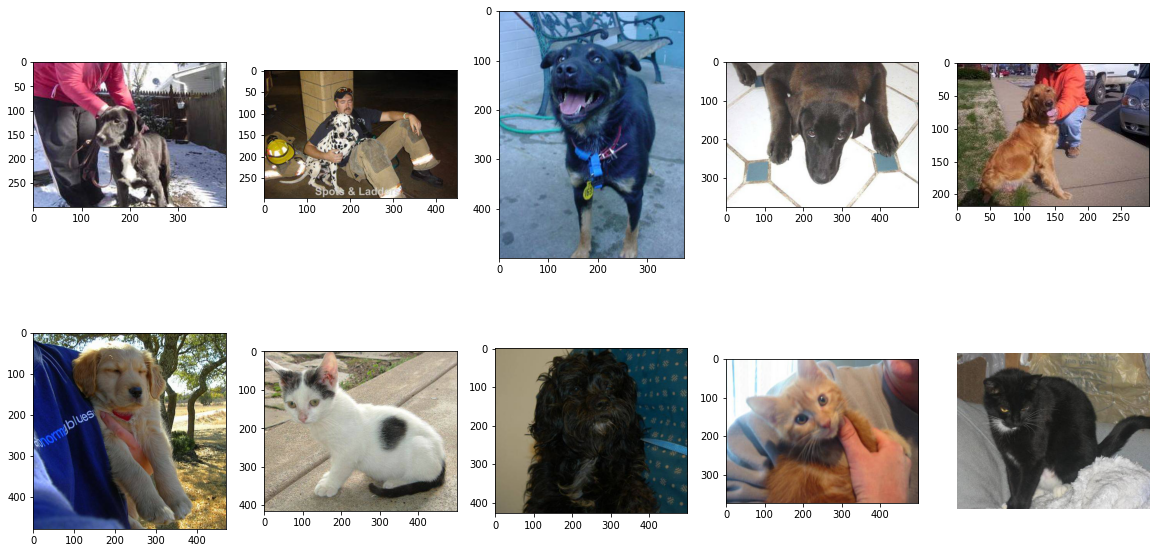

In [10]:
np.random.seed(1313131313)
random_idx = np.random.randint(1,len(train_list),size=10)
print(random_idx)
fig = plt.figure(figsize=(20., 10.))

for i, img_idx in enumerate(random_idx):
    ax = fig.add_subplot(2,5,i+1)
    img = Image.open(train_list[img_idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

[ 9511  7110  9104  7890  5456 10705  7373  4795 10884  1667]
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/dog.10678.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/dog.9582.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/dog.2589.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/dog.3780.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/dog.7123.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/dog.3249.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/cat.3.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/dog.2292.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/cat.8740.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
local_data/train/cat.11476.jpg


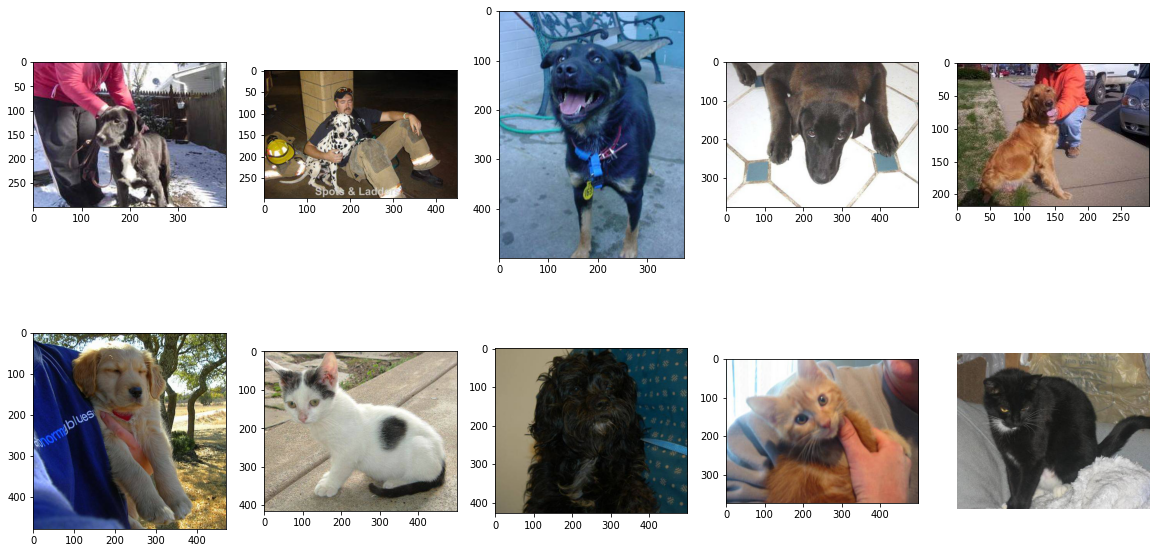

In [11]:
np.random.seed(1313131313)
random_idx = np.random.randint(1,len(train_list),size=10)
print(random_idx)
fig = plt.figure(figsize=(20., 10.))

for i, img_idx in enumerate(random_idx):
    ax = fig.add_subplot(2,5,i+1)
    img = Image.open(train_list[img_idx])
    print(type(img))
    print(train_list[img_idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

(300, 399, 3)


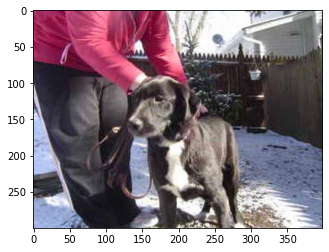

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline  # if you are running this code in Jupyter notebook

# reads image 'opencv-logo.png' as grayscale
img = cv2.imread('local_data/train/dog.10678.jpg')[...,::-1] #same as [:,:,::-1]; opencv reads in bgr, but matplotlib uses rgb
plt.imshow(img)
print(img.shape)

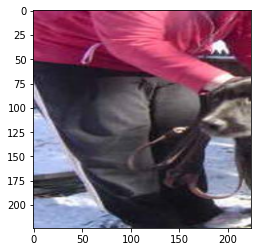

In [13]:
plt.imshow(cv2.resize(img[:,:170,:],[224,224]))

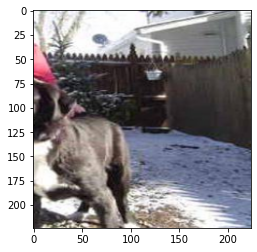

In [14]:
plt.imshow(cv2.resize(img[:,190:,:],[224,224]))

[ 9511  7110  9104  7890  5456 10705  7373  4795 10884  1667]


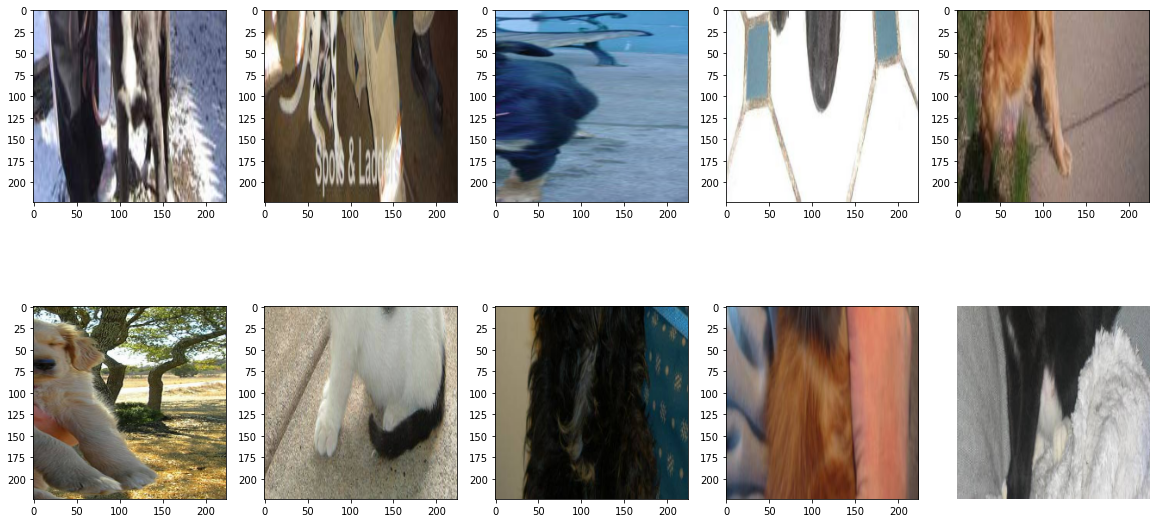

In [15]:
np.random.seed(1313131313)
random_idx = np.random.randint(1,len(train_list),size=10)
print(random_idx)
fig = plt.figure(figsize=(20., 10.))

for i, img_idx in enumerate(random_idx):
    ax = fig.add_subplot(2,5,i+1)
    img = cv2.imread(train_list[img_idx])[...,::-1] #same as [:,:,::-1]; opencv reads in bgr, but matplotlib uses rgb
    h,w,c = img.shape
    if h > w:
      h = int(0.5 * h)
      img = img[:,h:,:]
    else:
      w = int(0.5 * w)
      img = img[w:,:,:]

    img = cv2.resize(img,[224,224])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

[ 9511  7110  9104  7890  5456 10705  7373  4795 10884  1667]


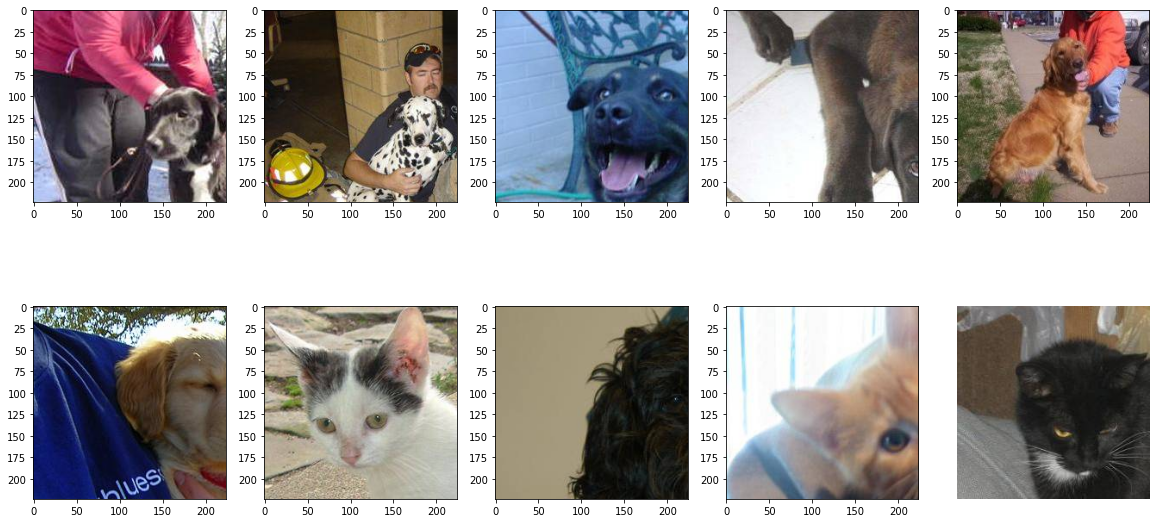

In [16]:
np.random.seed(1313131313)
random_idx = np.random.randint(1,len(train_list),size=10)
print(random_idx)
fig = plt.figure(figsize=(20., 10.))

for i, img_idx in enumerate(random_idx):
    ax = fig.add_subplot(2,5,i+1)
    img = cv2.imread(train_list[img_idx])[...,::-1] #same as [:,:,::-1]; opencv reads in bgr, but matplotlib uses rgb
    h,w,c = img.shape
    img = img[:224,:224,:]


    img = cv2.resize(img,[224,224])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()